<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
Second Semester, 2019-20
</center></h1>

<h2><center>Assignment 2 – PS3 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
  <li>Submit only the .IPYNB file. Intermediate files to be attached as mentioned in (2).</li>
  <li>All the visuals should adhere to the visualization principles learnt in the Course.</li>
  <li>All your visuals should be adequately labelled.</li>
  <li>Fill in the below asked information.</li>
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No</h2>

<table>
  <tr>
    <th><center>Full Name</center></th>
    <th><center>BITS ID</center></th>
  </tr>
  <tr>
    <td><center>Snigdha Tarua</center></td>
    <td>2019ab04171</td>
  </tr>
  <tr>
    <td><center>Sanka Mahesh Sai</center></td>
    <td>2019ab04135</td>
  </tr>
  <tr>
    <td><center>Aravapalli Chandra Sekhar Gupta</center></td>
    <td>2019ab04187</td>
  </tr>
</table>

<h3>Objective</h3>
<h4>What are the features which have the most impact on the car price?</h4>

##  Download and Prep the Data: 3 Marks

<h4>Import the libraries needed</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4> Load data and store in dataframe </h4>

In [2]:
data = pd.read_csv("dvi-a2-ps3-data.csv")
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [18]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

<strong>Missing Data</strong>
* Fill missing data category horsepower-binned with the mode of the column i.e. Low


<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [35]:
data.describe(include='all')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
data.describe(include=["object"])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h4> Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower<br>
Write down your observations in a markdown cell below <h4>

(19.5, -0.5)

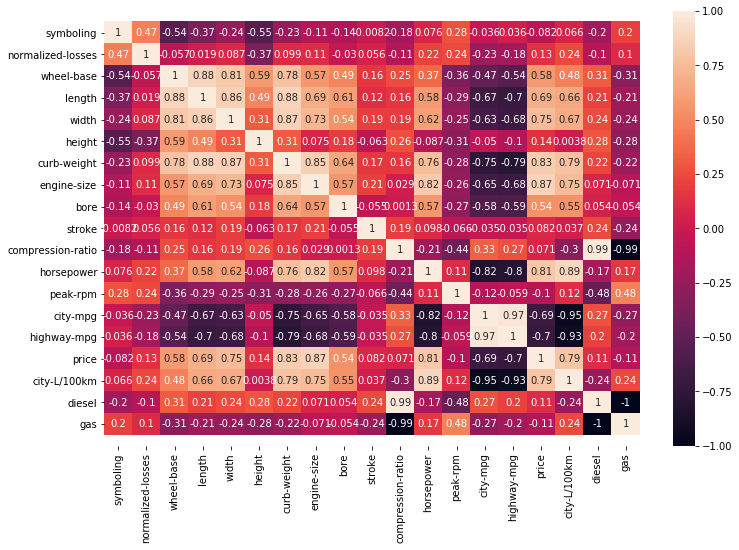

In [6]:
plt.figure(figsize=(12,8))
df_corr = data.corr()
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<strong>Findings</strong>

* curb-size, engine-size, horsepower are positively corelated
* city-mpg,highway-mpg are negatively corelated

(5.5, -0.5)

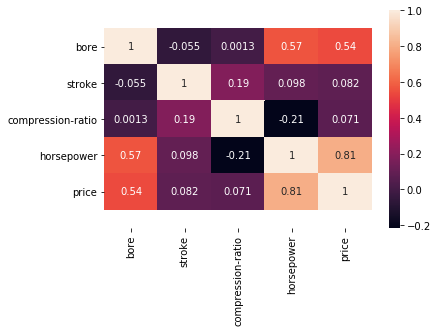

In [7]:
# let's concentrate on few columns

data_corr = data[["bore", "stroke", "compression-ratio", "horsepower", "price"]].corr()
ax = sns.heatmap(data_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Visualisation Questions - 2X5 = 10 Marks

### Question 1
<h4>What kind of a correlation exists between<br><br>
    a."engine-size" and "price"<br><br>
    b."highway-mpg" and "price"<br><br>
    c."peak-rpm" and "price"<br><br>
    Use appropriate visuals to demonstrate the same.Use subplots.
<h4>Clearly mention in markdown cells below the visual <br><br>1.You obseravtaion about the relationship .Which among engine-size ,highway-mpg and peak-rpm is a potential predictor variable of price<br><br>
    2.The reason for selecting the chart type you did in a markdown cell below

Text(0.5, 1.0, 'Engine Size vs Price')

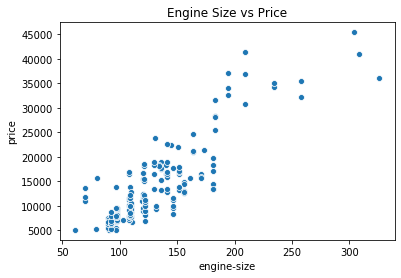

In [8]:
sns.scatterplot(data=data, x="engine-size", y="price").set_title('Engine Size vs Price')

<strong>Findings</strong>
* As the engine-size increases price of the car increases. There exists a positve correlation between engine-size and car

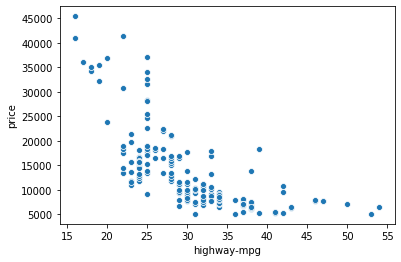

In [9]:
sns.scatterplot(data=data, x="highway-mpg", y="price")

<strong>Findings</strong>
* As the highway-mpg increases price of the car decreases. There exists a negative correlation between highway-mpg and car

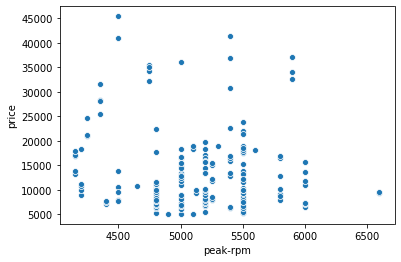

In [10]:
sns.scatterplot(data=data, x="peak-rpm", y="price")

<strong>Findings</strong>
* There doesnot seem to have any correlation between peak-rpm and price

<strong>Reason for choosing scatter plot to check the correlation</strong>  
* A scatterplot is a type of data display that shows the relationship between two numerical variables

We often see patterns or relationships in scatterplots.
* When the y variable tends to increase as the x variable increases, we say there is a <strong>positive</strong> correlation between the variables.
* When the y variable tends to decrease as the x variable increases, we say there is a <strong>negative</strong> correlation between the variables.
* When there is no clear relationship between the two variables, we say there is <strong>no correlation</strong> between the two variables.

### Question 2
<h4> Use boxplots to visualise the relationship between<br>
    a."body-style" and "price". <br><br>
    b."engine-location" and "price" <br><br>
    c."drive-wheels"and "price" <br><br>   
    Use appropriate visuals to demonstrate the same.Use subplots.
<h4>Clearly mention in markdown cells below the visual <br>1.Your observataion about the relationship .Which among engine-location ,body-style and drive-wheels is a potential predictor variable of price<br>
    

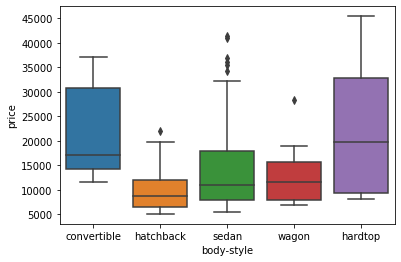

In [11]:
import seaborn as sns
sns.boxplot(data=data, x="body-style", y="price")

<strong>Findings</strong>
* Hardtop model are expensive in prices followed by convertible and sedan body style

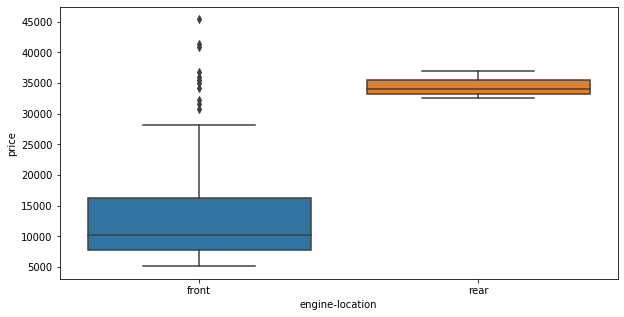

In [40]:
import seaborn as sns
sns.boxplot(data=data, x="engine-location", y="price")

<strong>Findings</strong>
* In general rear engine located cars are priced higher compared to front engine located cars


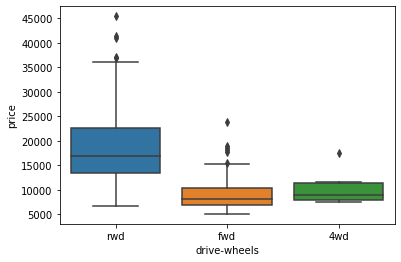

In [13]:
import seaborn as sns
sns.boxplot(data=data, x="drive-wheels", y="price")

<strong>Findings</strong>
* rwd wheel drive vehicle have expensive prices

### Question 3 
<h4> Perform a Descriptive Statistical Analysis of the data set<br>
    Compute basic statistics for all continuous variables

In [36]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


  ### Question 4
  <h4> Perform a Descriptive Statistical Analysis of the data set<br>
    Compute basic statistics for all variables of type 'Object'

<strong>Univariate analysis</strong>

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

/home/mahesh/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:404: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


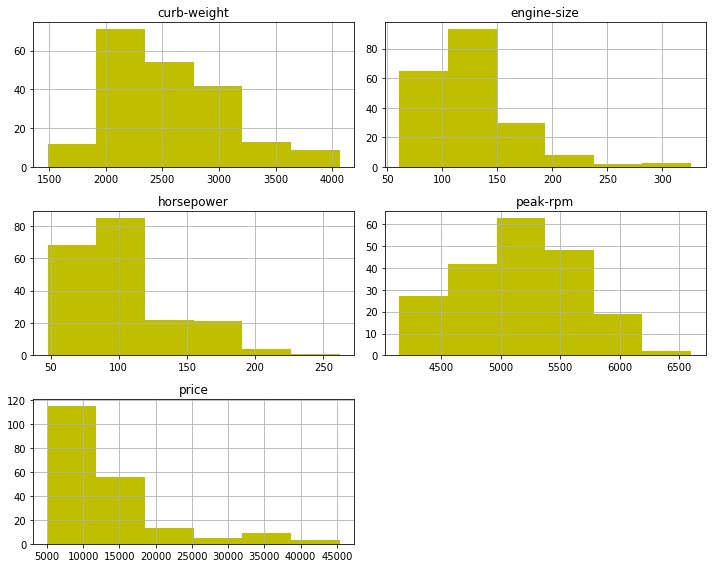

In [20]:
data[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='Y')
plt.tight_layout()
plt.show()

<strong>Findings</strong>

* Most of the car has a Curb Weight is in range 1900 to 3100
* The Engine Size is inrange 60 to 190
* Most vehicle has horsepower 50 to 125
* Most Vehicle are in price range 5000 to 18000
* Peak rpm is mostly distributed between 4600 to 5700

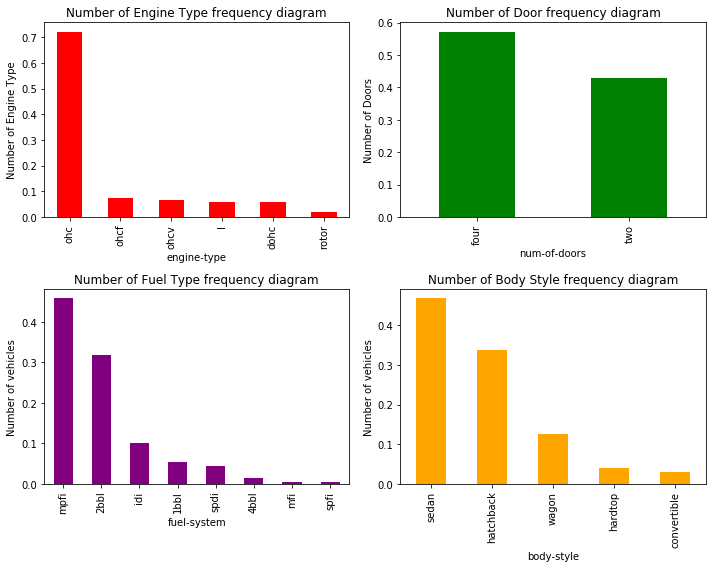

In [27]:
plt.figure(1)
plt.subplot(221)
data['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
data['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
data['fuel-system'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-system');

plt.subplot(224)
data['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

<strong>Findings</strong>

* More than 70 % of the vehicle has Ohc type of Engine
* 57% of the cars has 4 doors
* mpfi and 2bbl fuel-systems have more than 70% occupancy in fuel system types
* Most produced vehicle are of body style sedan around 48% followed by hatchback 32%

<strong>Bivariate analysis</strong>  
Price Analysis



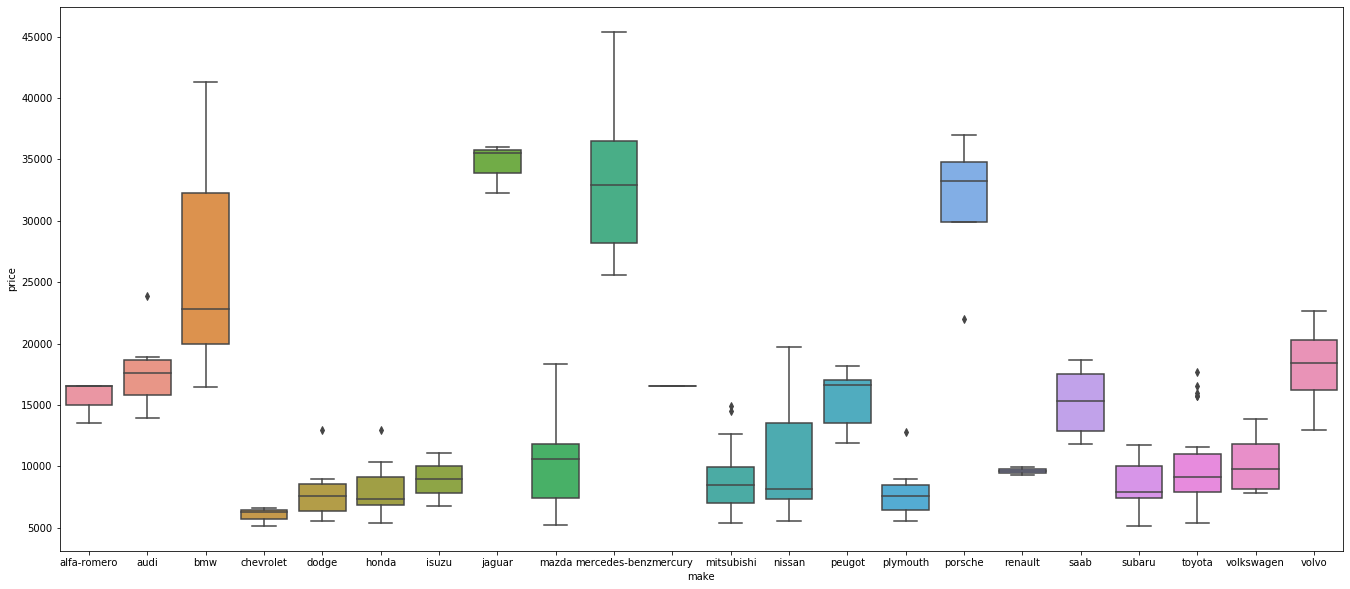

In [29]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=data)

<strong>Findings</strong>

* Mercedez-Benz ,BMW, Jaguar, Porshe produces expensive cars more than 25000
* Cheverolet,dodge, honda,mitbushi, nissan,plymouth subaru,toyata produces budget models with lower prices
* Most of the cars comapany produces car in range below 25000

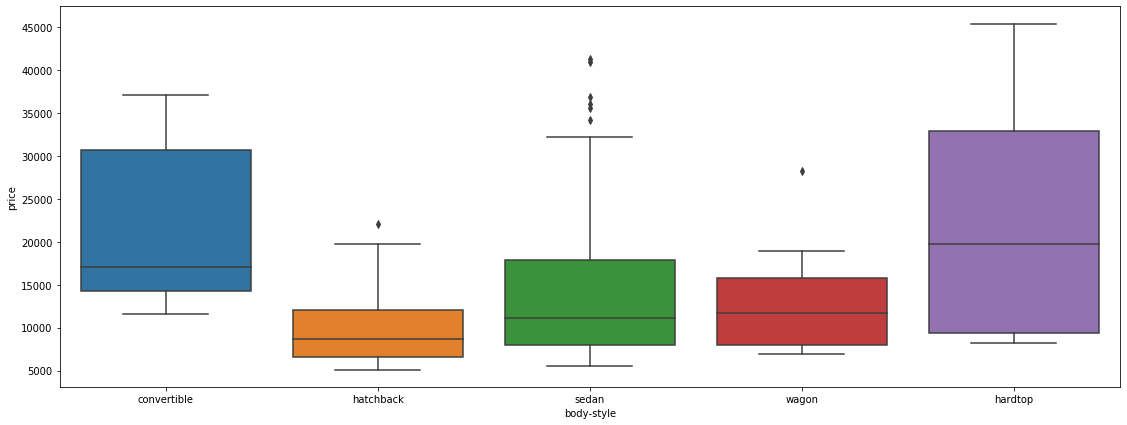

In [31]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="body-style", y="price", data=data)

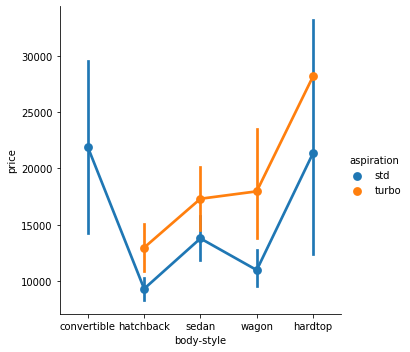

In [38]:
sns.catplot(data=data, x="body-style", y="price", hue="aspiration" ,kind="point")

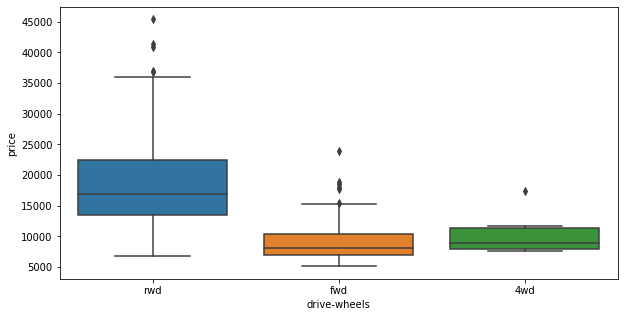

In [33]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=data)

<strong>Findings</strong>

* Hardtop model are expensive in prices followed by convertible and sedan body style
* Turbo models have higher prices than for the standard model
* Convertible has only standard edition with expensive cars
* hatchback and sedan turbo models are available below 20000
* rwd wheel drive vehicle have expensive prices

### Question 5
<h4> Use a single heat map to visualize the relationship between Body Style and Drive-wheel vs Price.</h4>
<h4>Perform the data preprocessing required.<br>

<p>The heatmap should plot  the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

The plot should have labels for x axis and y axis<br>
Write down your observations in a markdown cell below the visual</h4>

#### Summarize your observations

<h3><center>END OF ASSIGNMENT</center><h34>